In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
%matplotlib inline

In [42]:
df = pd.read_csv("HousingData.csv")

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [43]:
df.fillna(df.mean(), inplace=True)
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
correlation_matrix =df.corr()

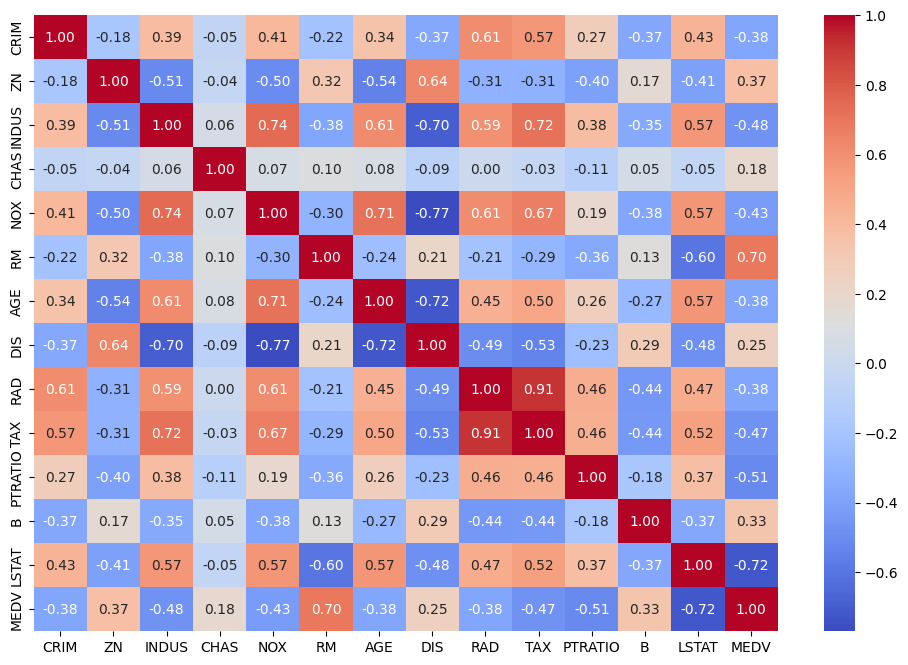

In [14]:
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.show()

In [44]:

X = df[["LSTAT", "RM", "PTRATIO"]]
y = df["MEDV"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [32]:
y_pred = lr.predict(X_test)

Mean Squared Error: 26.094654080475625
Mean Absolute Error: 3.589682542354175
R^2 Score: 0.6497977451935487


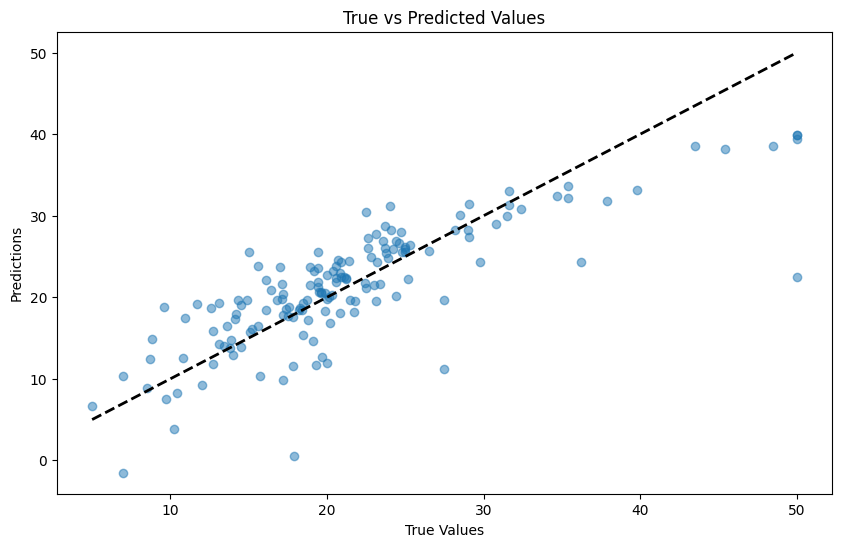

In [33]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [45]:
s = StandardScaler()
X = df.drop(columns='MEDV')
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [46]:
y_train.values.reshape(-1, 1)

array([[12. ],
       [19.9],
       [19.4],
       [13.4],
       [18.2],
       [24.6],
       [21.1],
       [24.7],
       [ 8.7],
       [27.5],
       [20.7],
       [36.2],
       [31.6],
       [11.7],
       [39.8],
       [13.9],
       [21.8],
       [23.7],
       [17.6],
       [24.4],
       [ 8.8],
       [19.2],
       [25.3],
       [20.4],
       [23.1],
       [37.9],
       [15.6],
       [45.4],
       [15.7],
       [22.6],
       [14.5],
       [18.7],
       [17.8],
       [16.1],
       [20.6],
       [31.6],
       [29.1],
       [15.6],
       [17.5],
       [22.5],
       [19.4],
       [19.3],
       [ 8.5],
       [20.6],
       [17. ],
       [17.1],
       [14.5],
       [50. ],
       [14.3],
       [12.6],
       [28.7],
       [21.2],
       [19.3],
       [23.1],
       [19.1],
       [25. ],
       [33.4],
       [ 5. ],
       [29.6],
       [18.7],
       [21.7],
       [23.1],
       [22.8],
       [21. ],
       [48.8],
       [14.6],
       [16

In [47]:
y_train = s.fit_transform(y_train.values.reshape(-1, 1))
y_test = s.transform(y_test.values.reshape(-1, 1))

In [49]:
X_train.shape

(404, 13)

In [59]:
model_layers = [
    tf.keras.layers.Input(shape =(13,), name="input"),

    tf.keras.layers.Dense(128, activation = "relu", name="dense1"),
    tf.keras.layers.BatchNormalization(name="bn-1"),
    tf.keras.layers.Dropout(0.2, name="dp-1"),

    tf.keras.layers.Dense(64, activation = "relu", name="dense2"),
    tf.keras.layers.BatchNormalization(name="bn-2"),
    tf.keras.layers.Dropout(0.2, name="dp-2"),

    tf.keras.layers.Dense(32, activation = "relu", name="dense3"),

    tf.keras.layers.Dense(1, activation = None, name="output"),

]
model = tf.keras.Sequential(model_layers)

In [60]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense1 (Dense)                  │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn-1 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dp-1 (Dropout)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn-2 (BatchNormalization)       │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dp-2 (Dropout)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [61]:
model.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])

In [70]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [63]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_split = 0.2, verbose = 1)

Epoch 1/25


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2743 - mae: 0.3975 - val_loss: 0.2545 - val_mae: 0.3008
Epoch 2/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2842 - mae: 0.4088 - val_loss: 0.2619 - val_mae: 0.3060
Epoch 3/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4013 - mae: 0.4652 - val_loss: 0.2331 - val_mae: 0.2866
Epoch 4/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2417 - mae: 0.3831 - val_loss: 0.2223 - val_mae: 0.2823
Epoch 5/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2846 - mae: 0.4095 - val_loss: 0.2181 - val_mae: 0.2805
Epoch 6/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3373 - mae: 0.4445 - val_loss: 0.1943 - val_mae: 0.2728
Epoch 7/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2452 - mae: 0.3840 - val_loss: 0.2058 - val_mae: 0.2973
Epoch 8/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2945 - mae: 0.4133 - val_loss: 0.1882 - val_mae: 0.2916
Epoch 9/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3023 - mae: 0.4141 - 

In [64]:
model.evaluate(X_test, y_test, verbose = 1)
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1220 - mae: 0.2436 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


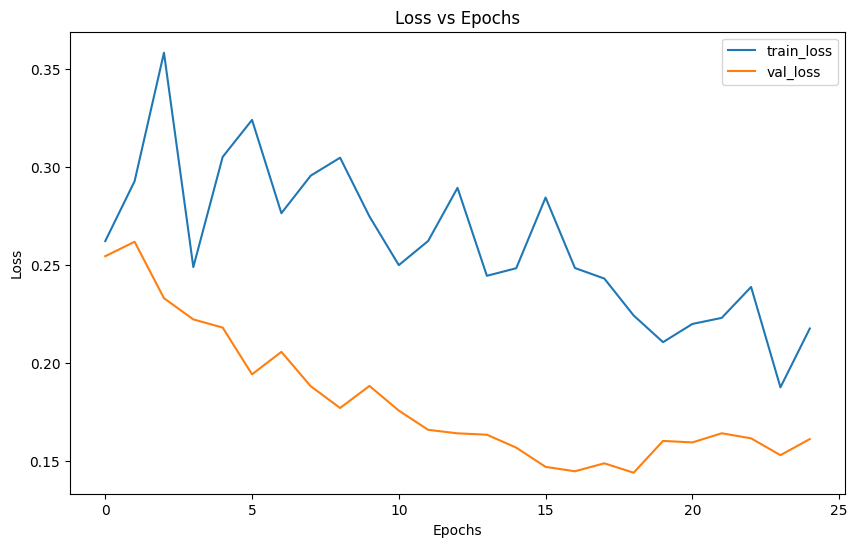

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


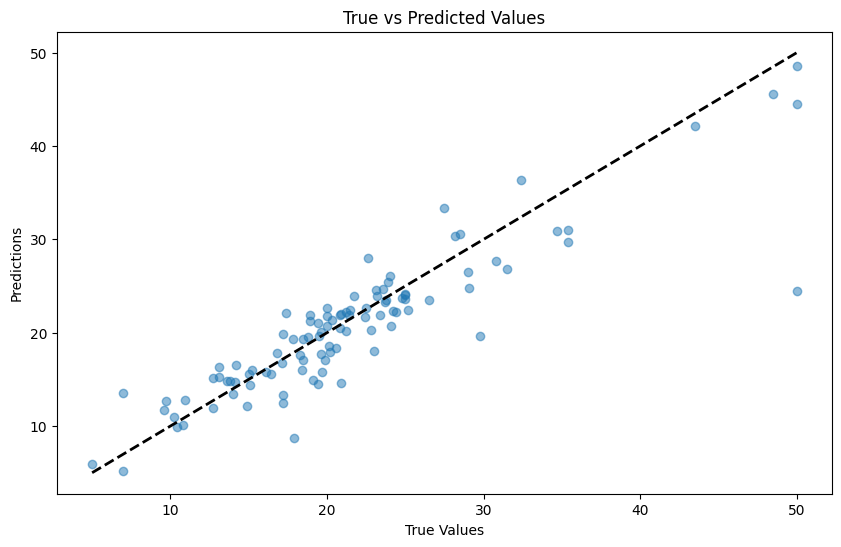

In [68]:
y_pred = s.inverse_transform(y_pred)
y_test = s.inverse_transform(y_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()